<a href="https://colab.research.google.com/github/nguyenphucloc22/test/blob/main/AI_Identify_fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
# Load the dataset
train_data = keras.preprocessing.image_dataset_from_directory(
'/content/drive/MyDrive/Project AI_Final/ImageTrain_Datasets', # path to the dataset
labels='inferred',
label_mode='int',
color_mode='rgb',
batch_size=32,
image_size=(100, 100),
shuffle=True,
seed=42,
validation_split=0.2,
subset='training')
val_data = keras.preprocessing.image_dataset_from_directory(
'/content/drive/MyDrive/Project AI_Final/ImageTrain_Datasets', # path to the dataset
labels='inferred',
label_mode='int',
color_mode='rgb',
batch_size=32,
image_size=(100, 100),
shuffle=True,
seed=42,
validation_split=0.2,
subset='validation')

Found 500 files belonging to 5 classes.
Using 400 files for training.
Found 500 files belonging to 5 classes.
Using 100 files for validation.


In [47]:
# Define the model architecture
model = keras.models.Sequential([keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
keras.layers.MaxPooling2D((2, 2)),
keras.layers.Conv2D(64, (3, 3), activation='relu'),
keras.layers.MaxPooling2D((2, 2)),
keras.layers.Conv2D(128, (3, 3), activation='relu'),
keras.layers.MaxPooling2D((2, 2)),
keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(5, activation='softmax')])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 10, 10, 128)     

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
13/13 [==============================] - 10s 588ms/step - loss: 49.5098 - accuracy: 0.2775 - val_loss: 0.6498 - val_accuracy: 0.7500
Epoch 2/10
13/13 [==============================] - 11s 761ms/step - loss: 0.4026 - accuracy: 0.8700 - val_loss: 0.1820 - val_accuracy: 0.9500
Epoch 3/10
13/13 [==============================] - 11s 844ms/step - loss: 0.1162 - accuracy: 0.9550 - val_loss: 0.0759 - val_accuracy: 0.9800
Epoch 4/10
13/13 [==============================] - 13s 1s/step - loss: 0.0235 - accuracy: 0.9950 - val_loss: 0.0406 - val_accuracy: 0.9900
Epoch 5/10
13/13 [==============================] - 10s 744ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0434 - val_accuracy: 0.9800
Epoch 6/10
13/13 [==============================] - 8s 614ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0462 - val_accuracy: 0.9900
Epoch 7/10
13/13 [==============================] - 8s 561ms/step - loss: 4.4732e-04 - accuracy: 1.0000 - val_loss: 0.0467 - val_accuracy: 0.9800

In [49]:
model.save("model.h5") 

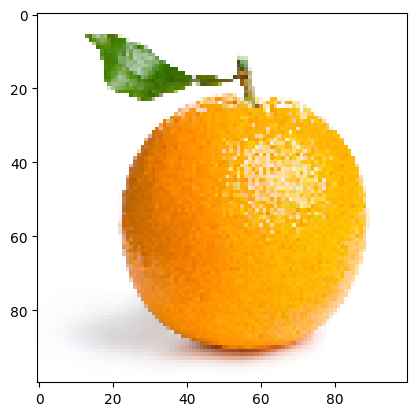

In [50]:
# Load the image
from keras.saving.saving_lib import load_model
from keras.models import load_model
import matplotlib.pyplot as plt
image = keras.preprocessing.image.load_img('/content/drive/MyDrive/Project AI_Final/ImageTest_Datasets/Cam.jpg', target_size=(100, 100))
image_array = keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
plt.imshow(image)
plt.show()

In [51]:
# Predict the class of the image
new_model=load_model("model.h5")
predicted_class = model.predict(image_array)
class_names = ['Cam', 'Chuoi', 'Man', 'Oi', 'Tao']
predicted_class_name = class_names[np.argmax(predicted_class)]
print(f"The predicted class is {predicted_class_name}.")


1/1 [==============================] - 0s 88ms/step
The predicted class is Cam.


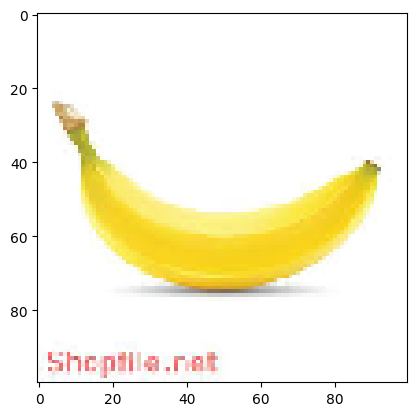

In [52]:
# Load the image
from keras.saving.saving_lib import load_model
from keras.models import load_model
import matplotlib.pyplot as plt
image = keras.preprocessing.image.load_img('/content/drive/MyDrive/Project AI_Final/ImageTest_Datasets/Chuoi1.jpg', target_size=(100, 100))
image_array = keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
plt.imshow(image)
plt.show()

In [53]:
# Predict the class of the image
predicted_class = model.predict(image_array)
class_names = ['Cam', 'Chuoi', 'Man', 'Oi', 'Tao']
predicted_class_name = class_names[np.argmax(predicted_class)]
print(f"The predicted class is {predicted_class_name}.")

1/1 [==============================] - 0s 44ms/step
The predicted class is Chuoi.
